<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/scipy.png" alt="Drawing" style="width:900px;">




# <center> 04. Variable Selection! </center>

- **SciPy** contains additional routines needed in scientific work: for example, routines for computing integrals numerically, solving differential equations, optimization, and sparse matrices.

In [ ]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Machine_Learning_Course/')
print(os.getcwd())


In [ ]:
#@title 2. LOAD LIB { display-mode: "form" }
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Populations
In statistical analysis, our focus shifts from individual observations to the broader characteristics of groups or populations. For the Iris dataset, these concepts manifest as follows:

**Questions About Individuals:**

- What is the sepal length of a specific Iris flower given certain conditions of growth and species?
- Can we predict the petal width of an Iris flower based on its sepal width?

**Questions About Populations:**

- What is the probability of observing an Iris flower with a petal length greater than 4 cm?
- If we encounter an Iris with a petal length of 5 cm, is it more likely to be of the species Iris virginica than Iris setosa?
- What is the likelihood that an Iris flower chosen at random from a certain species will have sepal width within a specific range?

#Distributions
The distribution of a characteristic, such as petal length or sepal width among Iris flowers, provides a mathematical model that can estimate probabilities for observing specific values within that population. For instance, we might find that the petal lengths of Iris setosa follow a certain distribution that helps us calculate the likelihood of finding a flower within a specific petal length range.



In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.shape)
iris.head(10)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


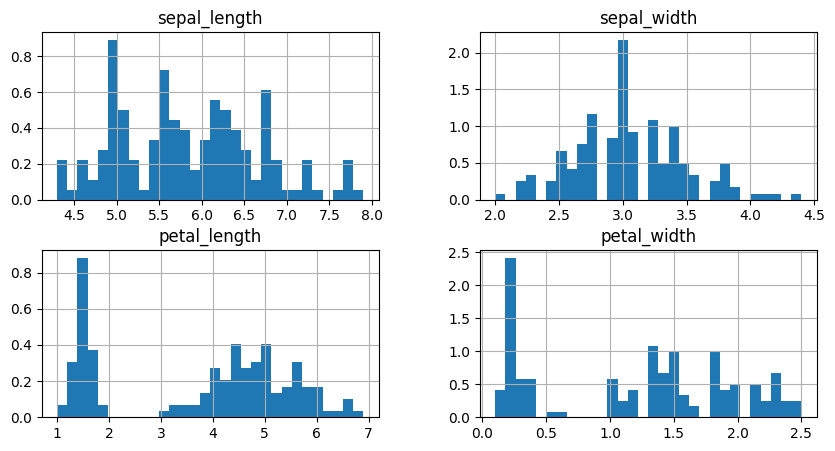

In [ ]:
iris.hist(bins=30,  density=True, figsize=(10,5));

do these distributions look familiar?

What is the probability of observing an Iris flower with a petal length greater than 4 cm??

$\rightarrow$ **observe the power of matrix notation**, try to understand what type of object is generated at each part of the following expressions

In [ ]:
print("%.3f"%np.mean(iris.petal_length), "%.3f"%np.std(iris.petal_length))
print("%.3f"%np.mean(iris.petal_length>4))

3.758 1.759
0.560



we just answered the question above empirically

# <span style="color:orange">Let's Analyse the petal_width and petal_length</span>:


In [ ]:
print(iris[iris.petal_length<3].petal_width.values)
print(iris[iris.petal_length<3].petal_length.values)

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2]
[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]


are length and width correlated??

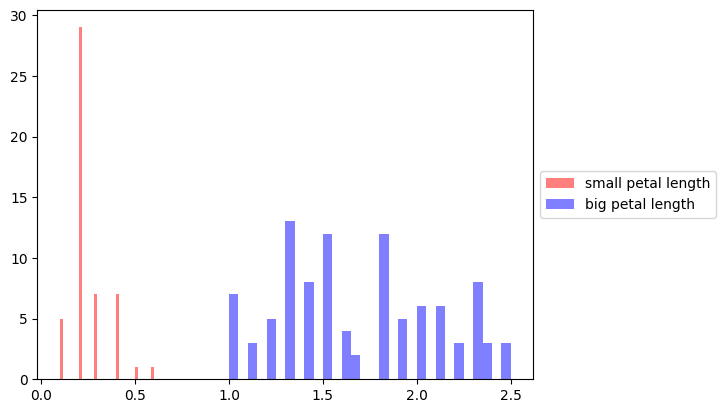

In [ ]:
plt.hist(iris[iris.petal_length<3].petal_width.values, bins=30, color="red",  alpha=.5,label="small petal length");
plt.hist( iris[iris.petal_length>=3].petal_width.values, bins=30, color="blue", alpha=.5, label="big petal length");
plt.legend(loc="center left", bbox_to_anchor=(1,.5))

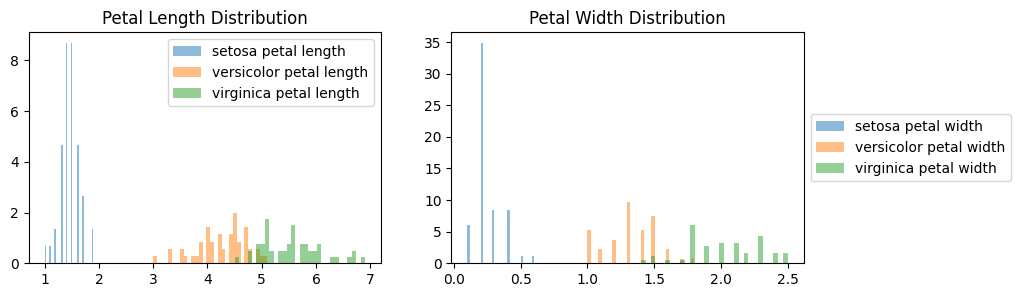

In [ ]:

# Create the figure and axes for the histograms
plt.figure(figsize=(10, 3))

# Histogram for the distribution of petal length by species
plt.subplot(121)
for species in iris['species'].unique():
    subset = iris[iris['species'] == species]
    plt.hist(subset['petal_length'].values, bins=30, density=True, alpha=0.5, label=f"{species} petal length")
plt.title("Petal Length Distribution")
plt.legend()

# Histogram for the distribution of petal width by species
plt.subplot(122)
for species in iris['species'].unique():
    subset = iris[iris['species'] == species]
    plt.hist(subset['petal_width'].values, bins=30, density=True, alpha=0.5, label=f"{species} petal width")
plt.title("Petal Width Distribution")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plots
plt.show()


and we can see the correlations more in a more global manner

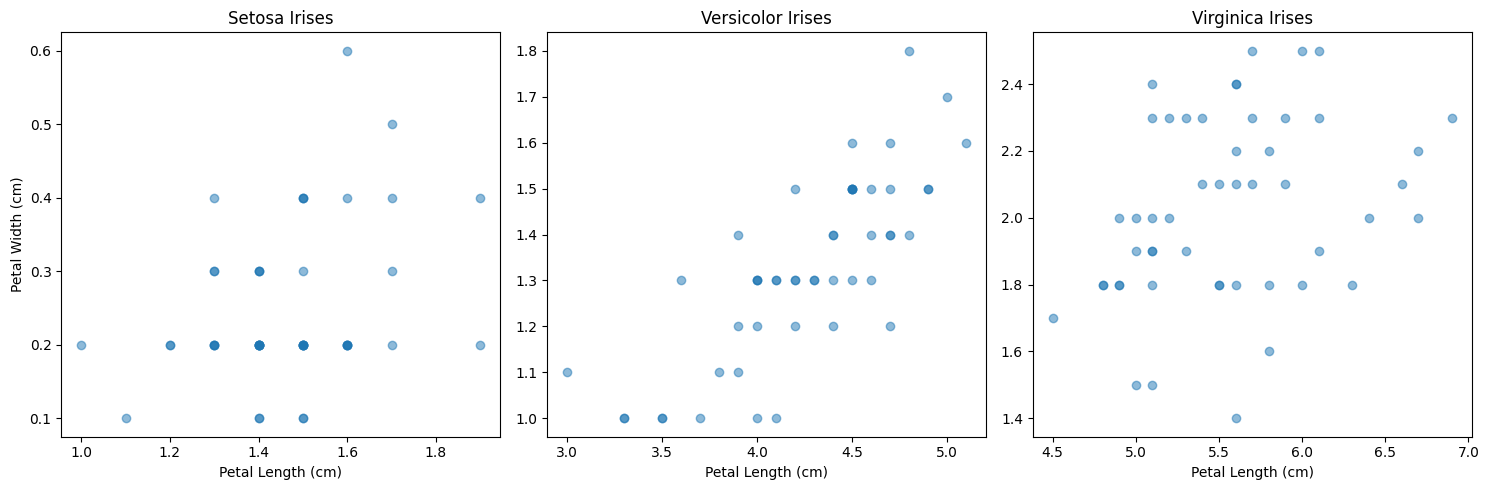

In [ ]:

# Create the figure with three subplots, one for each species
plt.figure(figsize=(15, 5))

# Iterate over each species to create a scatter plot for each
for i, species in enumerate(iris['species'].unique()):
    plt.subplot(1, 3, i+1)  # 1 row, 3 columns, ith subplot
    subset = iris[iris['species'] == species]
    plt.scatter(subset['petal_length'], subset['petal_width'], alpha=0.5)
    plt.title(f"{species.title()} Irises")
    plt.xlabel("Petal Length (cm)")
    if i == 0:  # Only add the y-axis label to the first plot for cleanliness
        plt.ylabel("Petal Width (cm)")

plt.tight_layout()
plt.show()



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/Correlation_examples2.png" style="width:700px;">

#Pearson's Correlation
- Pearson's correlation coefficient (r) is a statistic that measures the linear relationship between two variables.

$$ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} $$

- r near +1: As one variable increases, the other tends to increase as well. This is a strong positive linear relationship.

- r near -1: As one variable increases, the other tends to decrease. This is a strong negative linear relationship.

- r near 0: There is little to no straight-line relationship between the variables.


In [ ]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient between petal_length and petal_width
correlation_coefficient, p_value = pearsonr(iris['petal_length'], iris['petal_width'])

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.962865431402796
P-value: 4.675003907328653e-86


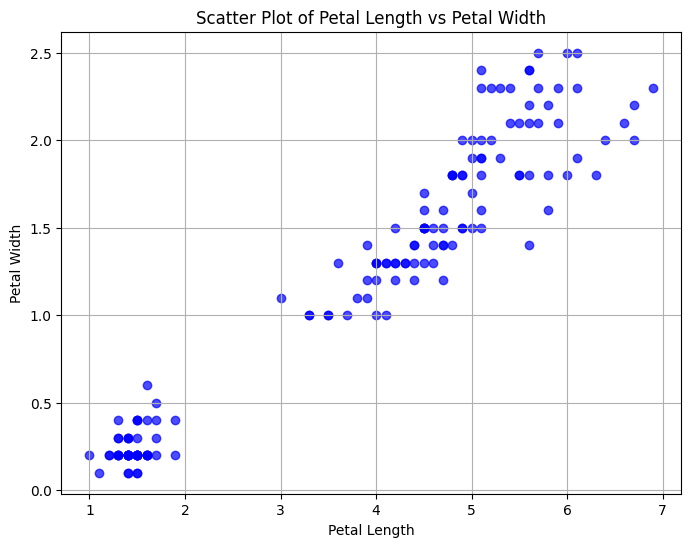

In [ ]:
import matplotlib.pyplot as plt

# Plot petal_length vs petal_width
plt.figure(figsize=(8, 6))
plt.scatter(iris['petal_length'], iris['petal_width'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid(True)
plt.show()


As wee se above the petal_length and petal_width have a strong correlation

### What is a P-value?

The p-value is the probability of observing results at least as extreme as those observed, under the assumption that the null hypothesis is true. In simpler terms, it measures how compatible your data are with the null hypothesis. The null hypothesis typically represents a baseline assumption or the absence of an effect (for example, "there is no relationship between these two variables").


**Interpreting the P-value**

- Low P-value (< 0.05): A common threshold for significance is 0.05. A p-value lower than 0.05 often leads researchers to reject the null hypothesis, concluding that the observed data are unlikely under the null hypothesis. This suggests that there is evidence in favor of the alternative hypothesis, indicating the presence of an effect or a relationship.

- High P-value (≥ 0.05): A high p-value suggests that the observed data are consistent with the null hypothesis. In this case, there isn't enough evidence to reject the null hypothesis, and it's concluded that any observed effects could be due to chance.

#Multicollinearity

Multicollinearity is a phenomenon in regression analysis where independent variables (predictors) exhibit strong linear relationships among themselves. This condition undermines the statistical assumption of predictor independence, complicating the interpretation of the model's coefficients. When multicollinearity is present, it becomes challenging to isolate the effect of a single predictor on the dependent variable because changes in one predictor are closely tied to changes in another.

- In the context of analyzing the Iris dataset, a common task might involve constructing a regression model to predict the sepal_length of an Iris flower based on other attributes like sepal_width, petal_length, and petal_width.

### The Variance Inflation Factor (VIF)
is a measure used to detect the presence and severity of multicollinearity in regression analysis. It quantifies how much the variance of an estimated regression coefficient increases if predictors are correlated. Here's a general interpretation of VIF values across different ranges:

- VIF = 1  indicates that the predictor is not correlated with any other independent variables in the model.
- 1 < VIF < 5 in this range suggest a moderate correlation with other predictors but not severe enough to warrant serious concerns about multicollinearity.
- VIF ≈ 5 is often considered a threshold, indicating a problematic level of correlation with other independent variables that could influence coefficient estimates.
- VIF > 5 suggest that there is substantial multicollinearity that may distort regression coefficients and make them unreliable.
- VIF ≥ 10 is commonly used as a more conservative threshold indicating very high multicollinearity. It implies that the variance of a regression coefficient is inflated by a factor of at least 10 due to multicollinearity with other predictors.


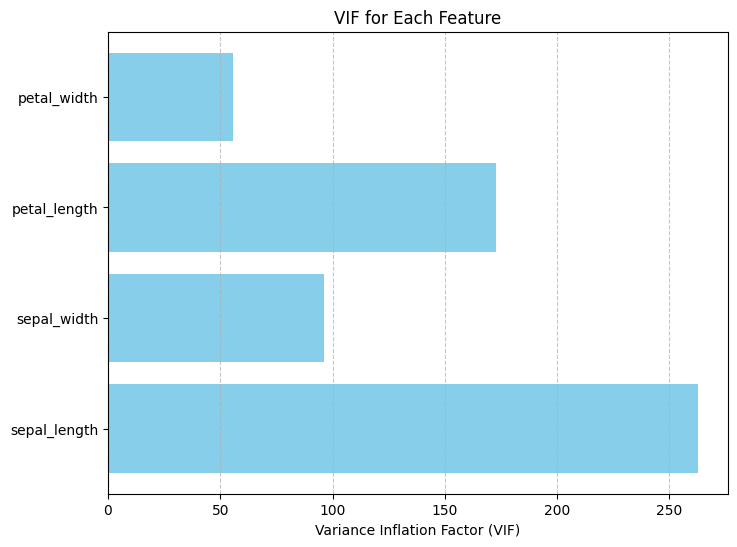

,feature,VIF
0,sepal_length,262.969348
1,sepal_width,96.353292
2,petal_length,172.960962
3,petal_width,55.502060


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric predictor variables
X = iris.drop(columns=['species'])  # Let's predict 'species'

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Add VIF scores for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]



plt.figure(figsize=(8, 6))
plt.barh(vif_data['feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('Variance Inflation Factor (VIF)')
plt.title('VIF for Each Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
vif_data



As you see all the variables are strong dependent

##Student

Let's see the relation of the variables in a different way

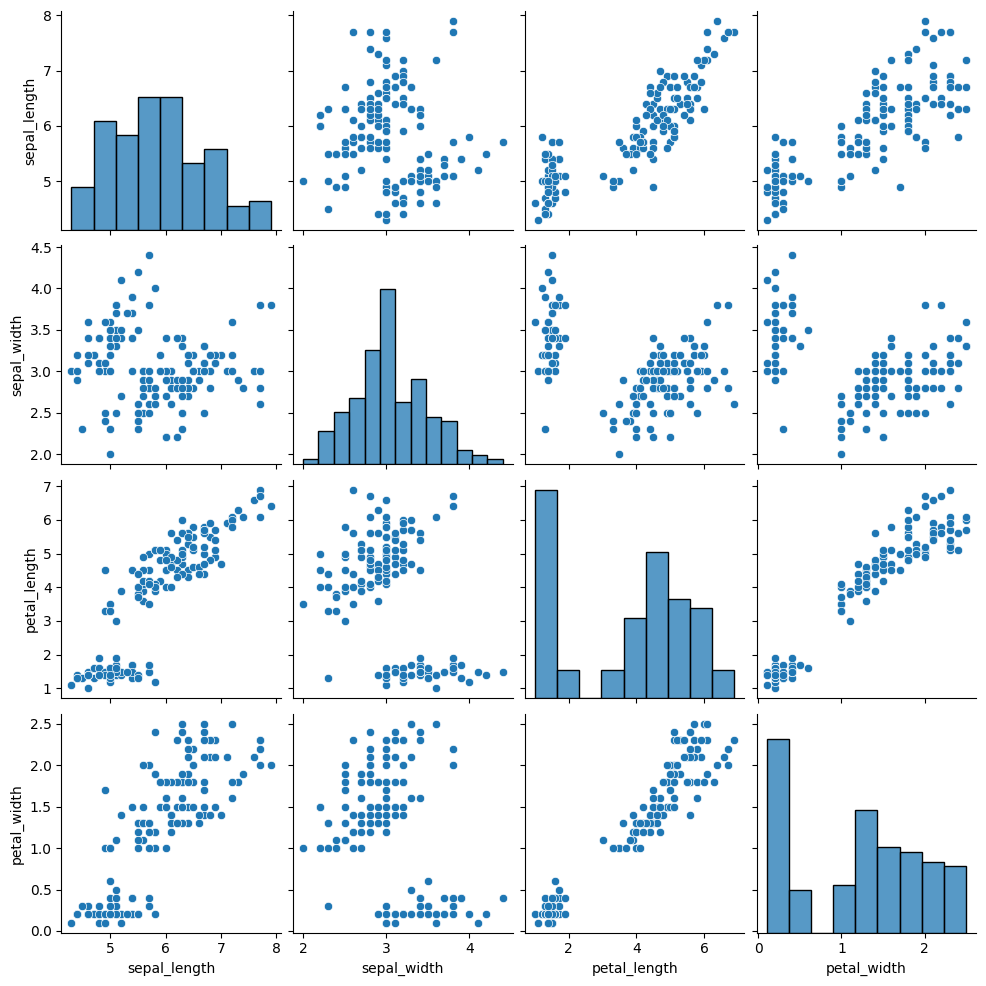

In [ ]:

import seaborn as sns

# Plot pairplot
sns.pairplot(X)
plt.title('')
plt.show()


What do you see :in each of the comparasion

# Feature Ratio Analysis

"FRA" could involve creating new features based on the ratios of existing features, with the goal of uncovering relationships that aren't immediately apparent when looking at the features independently. This technique can be particularly useful in domains where the interaction between numerical features could provide insights or predictive power beyond the individual features.



In [ ]:

# Create a new feature 'petal_length_to_width_ratio'
iris_2 = iris
iris_2['petal_length_to_width_ratio'] = iris_2['petal_length'] / iris_2['petal_width']

# Display the first few rows to verify the new feature
print(iris_2.head(5))


   sepal_length  sepal_width  petal_length  petal_width species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   petal_length_to_width_ratio  
0                          7.0  
1                          7.0  
2                          6.5  
3                          7.5  
4                          7.0  


Now let's see how this relate to the sepal length for each species

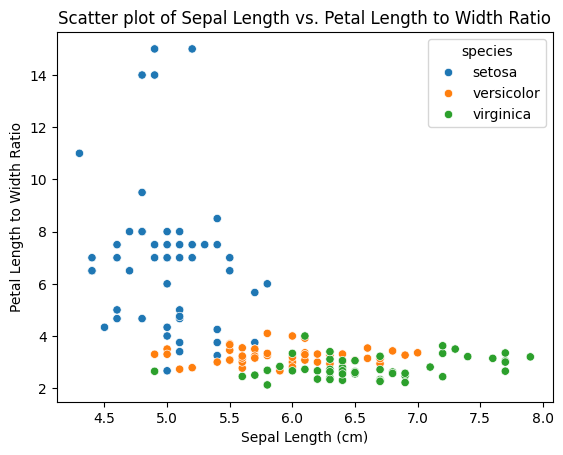

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'iris_2' is your DataFrame and it includes a 'species' column
sns.scatterplot(data=iris_2, x='sepal_length', y='petal_length_to_width_ratio', hue='species')

plt.title('Scatter plot of Sepal Length vs. Petal Length to Width Ratio')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length to Width Ratio')
plt.show()


The Petal Length to Width Ratio could be a useful feature for classifying setosa vs. other species, as there is clear separation. However, more features might be needed to distinguish versicolor from virginica.

# Recursive Feature Elimination

Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning to automatically select a subset of features from the original dataset. The primary goal of RFE is to identify the most relevant features that contribute the most to predicting the target variable while removing irrelevant or redundant features.

**Benefits of Recursive Feature Elimination (RFE):**

- Automatic Feature Selection: RFE automates the process of feature selection, reducing the need for manual trial and error.
- Improves Model Performance: By selecting only the most relevant features, RFE can improve the performance of machine learning models, such as increasing prediction accuracy and reducing overfitting.
- Handles Multicollinearity: RFE can handle multicollinearity issues by selecting features based on their individual importance rather than their correlation with other features.
- Enhances Model Interpretability: A reduced set of features selected by RFE can make the model more interpretable and easier to understand.

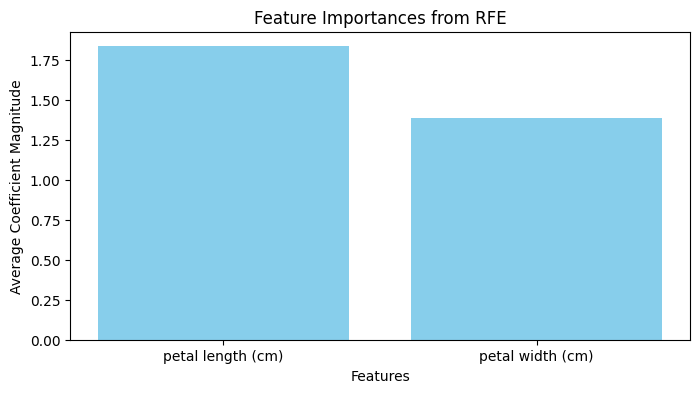

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the estimator (Logistic Regression for classification) and RFE
estimator = LogisticRegression(max_iter=500)
rfe = RFE(estimator, n_features_to_select=2)

# Fit RFE to the data
rfe.fit(X, y)

# Get the ranking of the features
ranking = rfe.ranking_

# Get the mask of selected features
selected_mask = rfe.support_

# Get the feature names
feature_names = np.array(iris.feature_names)

# Get selected feature names
selected_features = feature_names[selected_mask]

# Since this is a multi-class classification, take the mean importance of each feature across all classes
feature_importances = np.mean(np.abs(rfe.estimator_.coef_), axis=0)

# Plot
plt.figure(figsize=(8, 4))
plt.bar(range(len(selected_features)), feature_importances, color='skyblue', align='center')
plt.xticks(range(len(selected_features)), selected_features)
plt.xlabel('Features')
plt.ylabel('Average Coefficient Magnitude')
plt.title('Feature Importances from RFE')
plt.show()



The 'petal length (cm)' has a higher average coefficient magnitude compared to 'petal width (cm)', which suggests that 'petal length (cm)' is more influential in the model for predicting the species of the iris flower. The higher the coefficient magnitude, the more a change in that feature is associated with a change in the response variable.

#Variable selection using boosting
This is a technique where you use boosting algorithms to determine the importance of each feature in your dataset. Boosting is a type of ensemble learning where models are built sequentially, and each new model focuses on the errors of the previous one, improving the accuracy step by step. Features used by these models to make accurate predictions are often deemed important, while features not used as much may be considered less important.

###Here's a broad interpretation of what the scores mean:

- Higher Importance Scores: Features with higher scores are deemed by the model to have a greater impact on the prediction. A change in these feature values is likely to have a significant effect on the output of the model. In many cases, this means that the feature is good at helping the model distinguish between the different target classes or predict a continuous target accurately.

- Lower Importance Scores: Features with lower scores are considered by the model to have less influence on the prediction outcome. Changes in these features may have a smaller effect on the model's performance. Sometimes, such features might be candidates for removal during feature selection to reduce the model's complexity and potential overfitting.

- Zero or Near-Zero Scores: A feature with a zero or near-zero importance score is seen by the model as having no discernible effect on the predictions. These features are often removed from the model to improve efficiency and focus on more significant features.

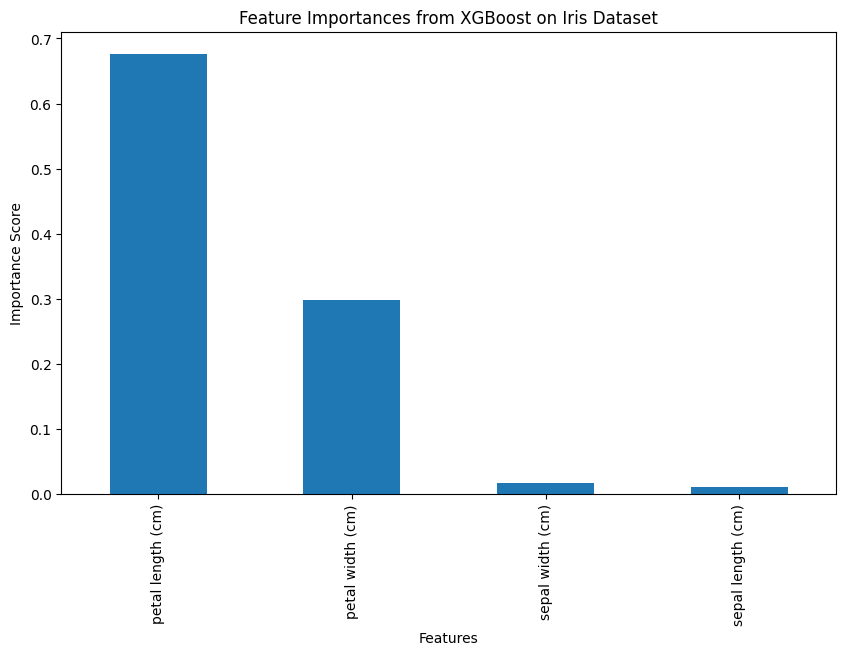

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas series with the feature importances
importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the features by their importance
sorted_importance = importance_series.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
sorted_importance.plot(kind='bar')
plt.title('Feature Importances from XGBoost on Iris Dataset')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()


- Petal Length: This feature has the highest importance score, suggesting that it is the most influential in determining the species of an iris flower in the dataset. When the petal length changes, it likely provides a strong signal that helps the model to distinguish between the species.

- Petal Width: The second most important feature, but with a significantly lower score than petal length. It still contributes to the model's ability to predict the species but not as much as petal length.

- Sepal Width and Sepal Length: These have very low importance scores, indicating that they contribute much less to the predictive power of the model for classifying the species of iris.

#Linear Regression

####**Now let's do some examples of linear regression using the most important and the lest importnt variable, trying to predict sepal_width**

#####Using petal_length

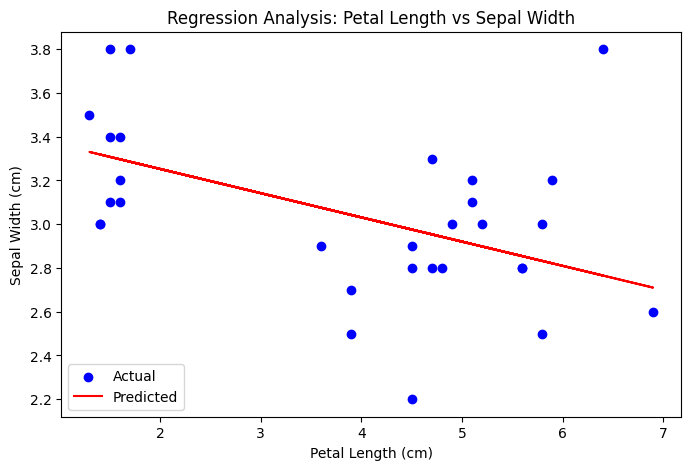

R^2 Score for Petal Length to predict Sepal Width: 0.16


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the Iris dataset
data = load_iris()
df = data['data']

# Columns: Sepal Length, Sepal Width, Petal Length, Petal Width
petal_length = df[:, 2]  # Petal Length
sepal_width = df[:, 1]  # Sepal Width

# Preparing data
X1 = petal_length.reshape(-1, 1)
y1 = sepal_width

# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Regression model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.plot(X1_test, y1_pred, color='red', label='Predicted')
plt.title('Regression Analysis: Petal Length vs Sepal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

# R^2 Score
r2_1 = r2_score(y1_test, y1_pred)
print(f"R^2 Score for Petal Length to predict Sepal Width: {r2_1:.2f}")


- The graph shows the relationship between Petal Length and Sepal Width using a linear regression model. The regression line (in red) and the actual data points (in blue) are plotted to visualize the fit.

 **R² Score: 0.16**

- The R² score indicates that approximately 16% of the variability in Sepal Width can be explained by Petal Length using this linear model.

#####Using sepal_width

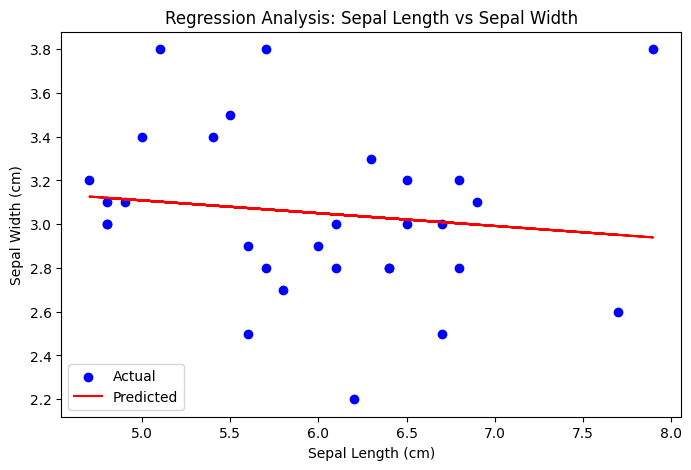

R^2 Score for Sepal Length to predict Sepal Width: 0.02


In [3]:
# Columns: Sepal Length, Sepal Width, Petal Length, Petal Width
sepal_length = df[:, 0]  # Sepal Length

# Preparing data
X2 = sepal_length.reshape(-1, 1)
y2 = sepal_width

# Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Regression model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X2_test, y2_test, color='blue', label='Actual')
plt.plot(X2_test, y2_pred, color='red', label='Predicted')
plt.title('Regression Analysis: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

# R^2 Score
r2_2 = r2_score(y2_test, y2_pred)
print(f"R^2 Score for Sepal Length to predict Sepal Width: {r2_2:.2f}")


- This graph illustrates the linear regression model where Sepal Length is used to predict Sepal Width. The regression line (in red) compared to the actual data points (in blue) helps visualize how the model fits the data.

 **R² Score: 0.02**

- The R² score is very low at 0.02, indicating that only about 2% of the variance in Sepal Width is explained by changes in Sepal Length. This confirms that Sepal Length is a weak predictor for Sepal Width.

# References

[1] statistic in plain english (book)

[2] Reference scipy: https://docs.scipy.org/doc/scipy/reference/index.html

[3] Some distributions in scipy: http://cmdlinetips.com/2018/03/probability-distributions-in-python/

[4] Statistical distributions: a summary: http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm

[5] Probability concepts explained: Introduction: https://towardsdatascience.com/probability-concepts-explained-introduction-a7c0316de465


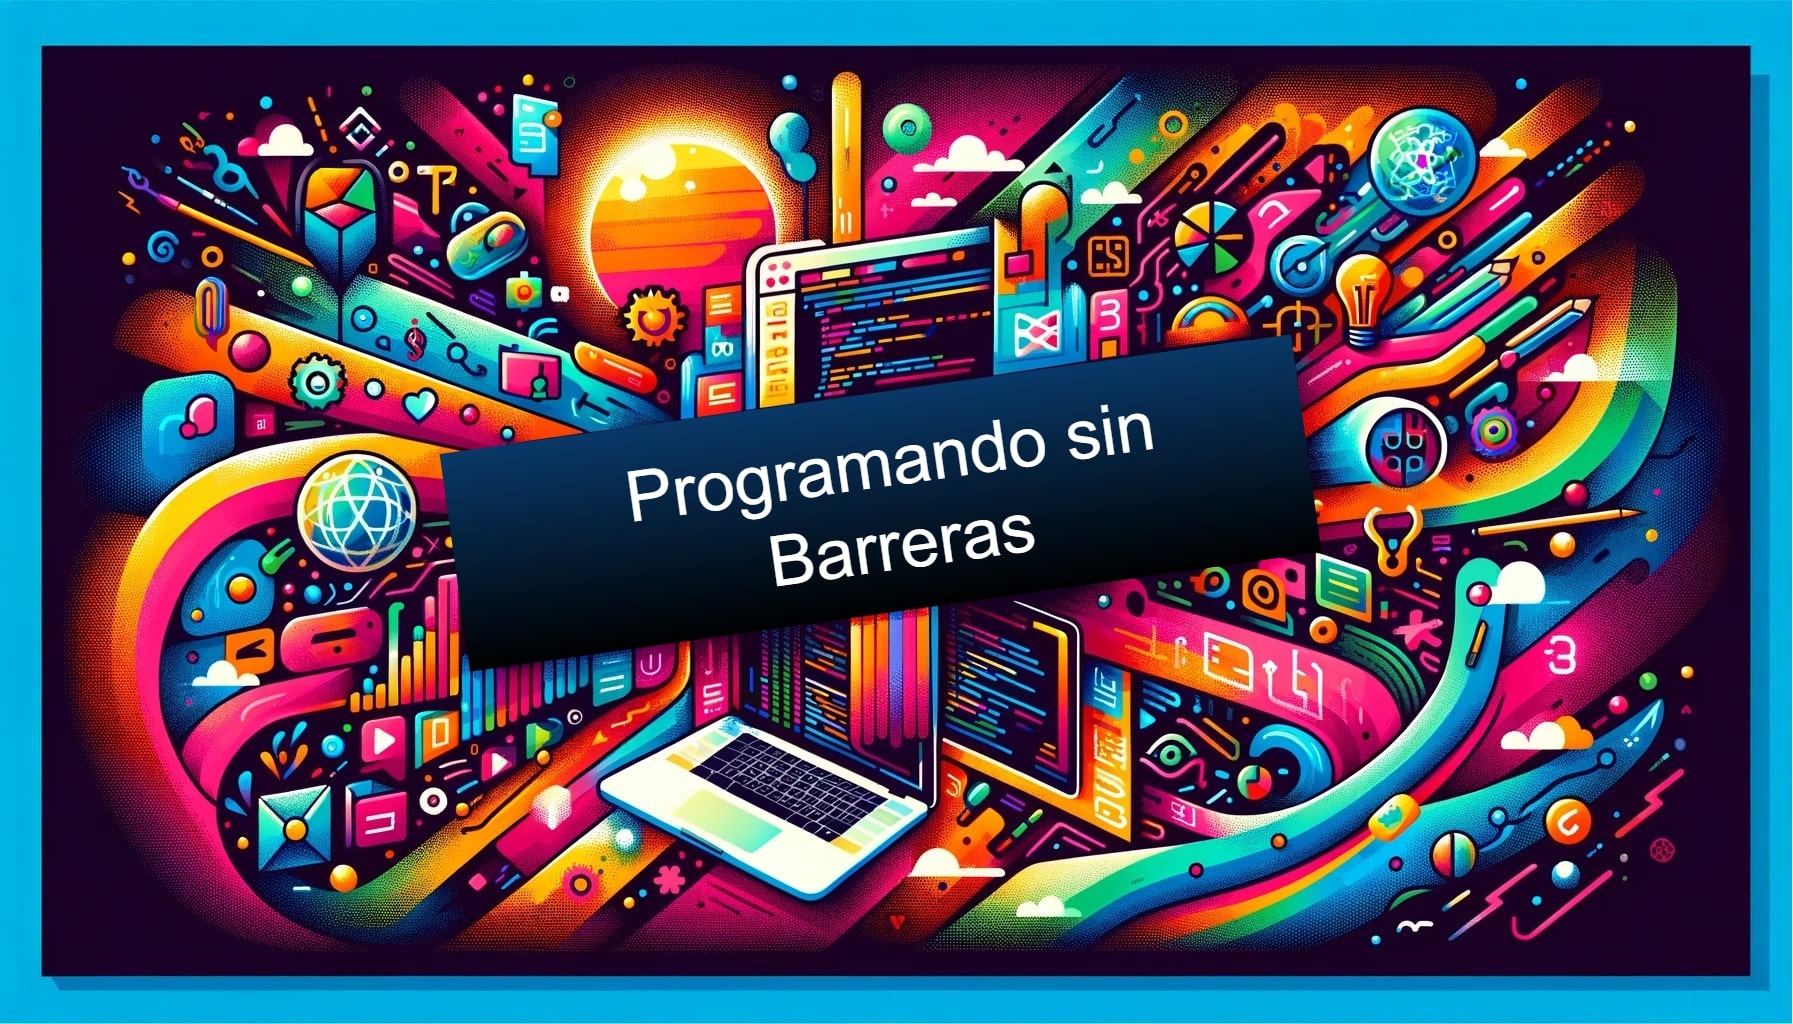